# 1. Returns

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

***

# Measuring Returns

## Return definition

For an investment from $t$ to $t+1$, the return is defined as,

$$r_{t\to t+1} \equiv \frac{p_{t+1}+d_{t+1}}{p_t}$$

where
* $p$ is the price of the asset
* $d$ is the dividend (or other cashflow) of the asset.

### Across asset classes

What would this definition be for a
* stock
* bond
* future contract
* currency

## Data

As an example for analyzing risk, we consider 
* ETF data on various asset classes
* daily frequency
* 2017 through present

The ETF data ensures
* we are looking at traded security returns, not indexes
* thus, no issue of rolling futures, carry on FX, etc.
* Though there may be differences due to fund expenses and fund tracking error (oil?)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

In [2]:
LOADFILE = '../data/risk_etf_data.xlsx'
info = pd.read_excel(LOADFILE,sheet_name='descriptions').set_index('ticker')
rets = pd.read_excel(LOADFILE,sheet_name='total returns').set_index('Date')
prices = pd.read_excel(LOADFILE,sheet_name='prices').set_index('Date')

FREQ = 252

In [3]:
info

,quoteType,shortName,volume,totalAssets,longBusinessSummary
ticker,,,,,
SPY,ETF,SPDR S&P 500,126096225,5.624998e+11,The Trust seeks to achieve its investment obje...
VEA,ETF,Vanguard FTSE Developed Markets,22548812,1.962653e+11,The fund employs an indexing investment approa...
UPRO,ETF,ProShares UltraPro S&P 500,13195956,3.573202e+09,The fund invests in financial instruments that...
GLD,ETF,SPDR Gold Trust,8736540,6.597675e+10,The Trust holds gold bars and from time to tim...
USO,ETF,United States Oil Fund,3924918,1.292350e+09,USO invests primarily in futures contracts for...
FXE,ETF,Invesco CurrencyShares Euro Cur,44991,1.747638e+08,NaN
BTC-USD,CRYPTOCURRENCY,Bitcoin USD,65087082496,NaN,NaN
HYG,ETF,iShares iBoxx $ High Yield Corp,103766729,1.680502e+10,The underlying index is a rules-based index co...
IEF,ETF,iShares 7-10 Year Treasury Bond,19070870,2.981841e+10,The underlying index measures the performance ...


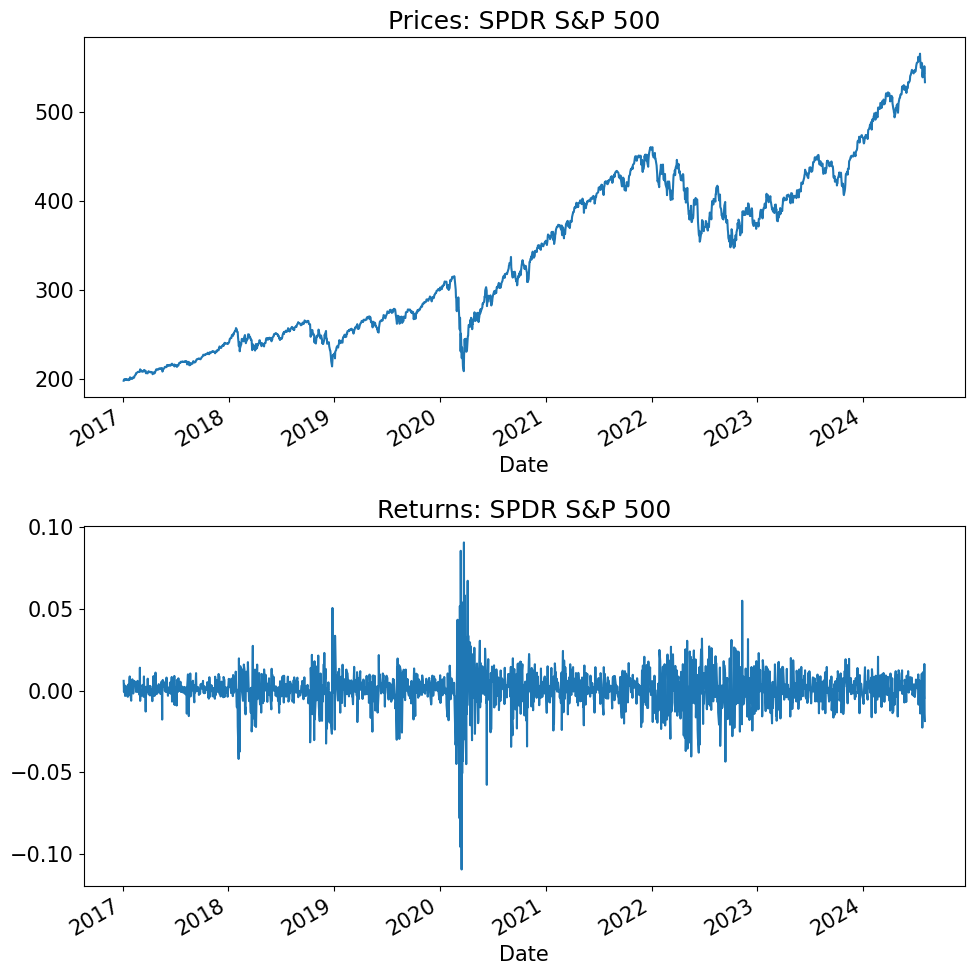

In [4]:
TICK = 'SPY'

fig, ax = plt.subplots(2,1,figsize=(10,10))
desc = info.loc[TICK,'shortName']
prices[TICK].plot(ax=ax[0],title=f'Prices: {desc}')
rets[TICK].plot(ax=ax[1],title=f'Returns: {desc}')
plt.tight_layout()
plt.show()

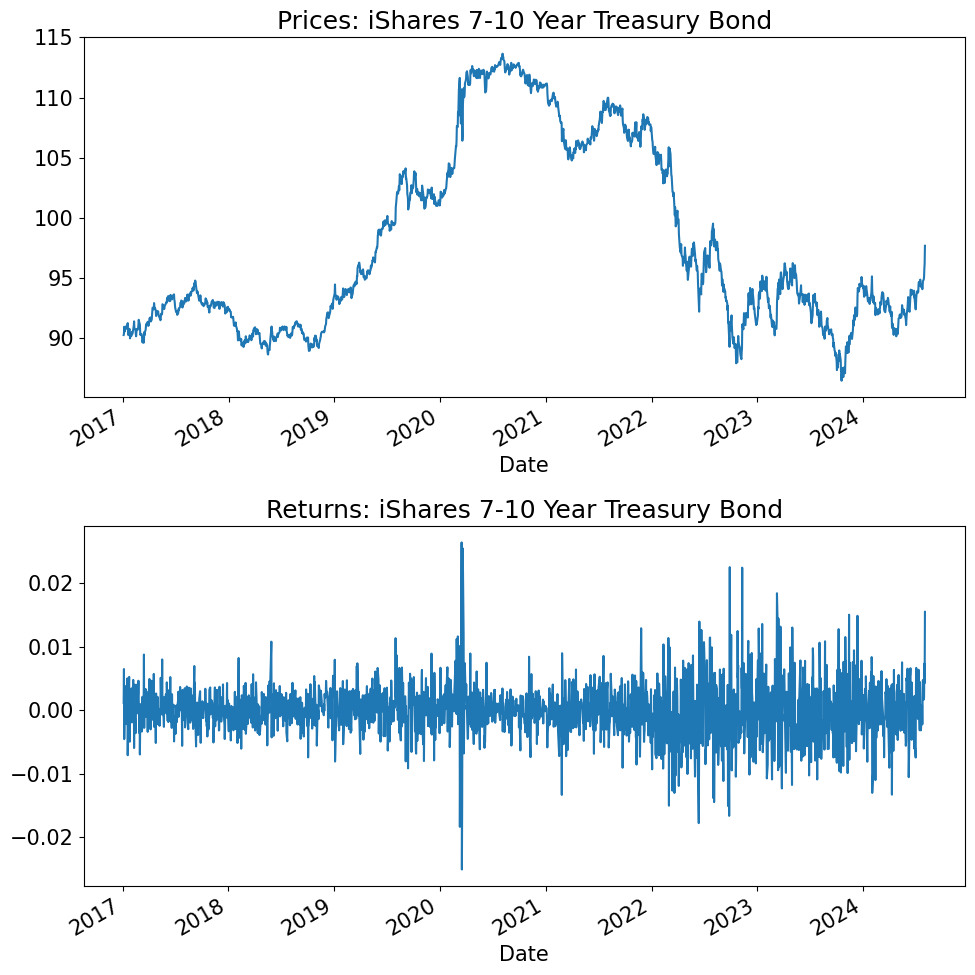

In [5]:
TICK = 'IEF'

fig, ax = plt.subplots(2,1,figsize=(10,10))
desc = info.loc[TICK,'shortName']
prices[TICK].plot(ax=ax[0],title=f'Prices: {desc}')
rets[TICK].plot(ax=ax[1],title=f'Returns: {desc}')
plt.tight_layout()
plt.show()

## Dividends

In [6]:
INFILE = f'../data/equity_data.xlsx'
TICK = 'AAPL'
TICKETF = 'SPY'
TICKIDX = 'SPX'

In [7]:
dvds = pd.read_excel(INFILE,sheet_name=f'dividends {TICK}').set_index('record_date')
dvds[dvds['dividend_type']=='Regular Cash'].head(8).style.set_caption(f'Dividends for {TICK}.')

,declared_date,ex_date,payable_date,dividend_amount,dividend_frequency,dividend_type
record_date,,,,,,
2024-05-13 00:00:00,2024-05-02 00:00:00,2024-05-10 00:00:00,2024-05-16 00:00:00,0.250000,Quarter,Regular Cash
2024-02-12 00:00:00,2024-02-01 00:00:00,2024-02-09 00:00:00,2024-02-15 00:00:00,0.240000,Quarter,Regular Cash
2023-11-13 00:00:00,2023-11-02 00:00:00,2023-11-10 00:00:00,2023-11-16 00:00:00,0.240000,Quarter,Regular Cash
2023-08-14 00:00:00,2023-08-03 00:00:00,2023-08-11 00:00:00,2023-08-17 00:00:00,0.240000,Quarter,Regular Cash
2023-05-15 00:00:00,2023-05-04 00:00:00,2023-05-12 00:00:00,2023-05-18 00:00:00,0.240000,Quarter,Regular Cash
2023-02-13 00:00:00,2023-02-02 00:00:00,2023-02-10 00:00:00,2023-02-16 00:00:00,0.230000,Quarter,Regular Cash
2022-11-07 00:00:00,2022-10-27 00:00:00,2022-11-04 00:00:00,2022-11-10 00:00:00,0.230000,Quarter,Regular Cash
2022-08-08 00:00:00,2022-07-28 00:00:00,2022-08-05 00:00:00,2022-08-11 00:00:00,0.230000,Quarter,Regular Cash


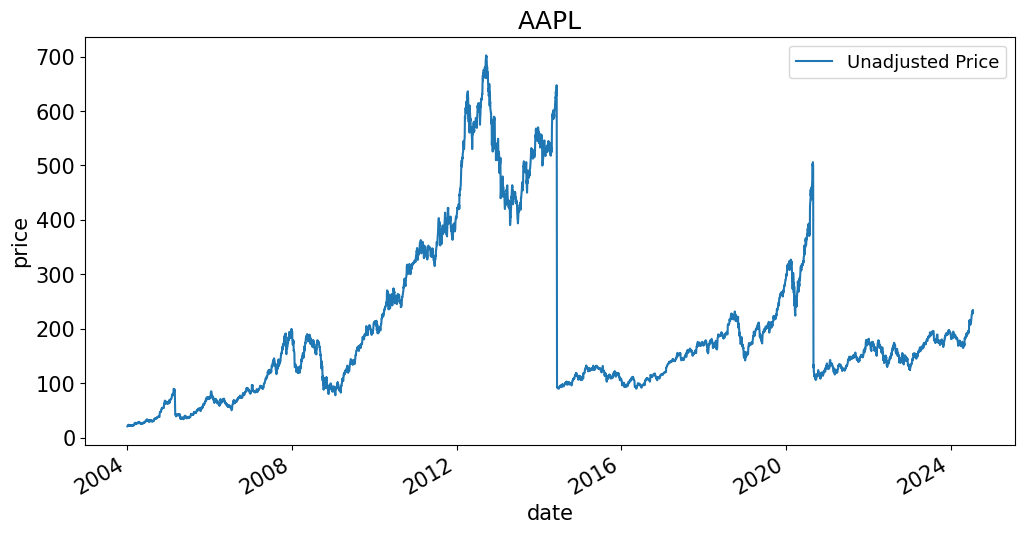

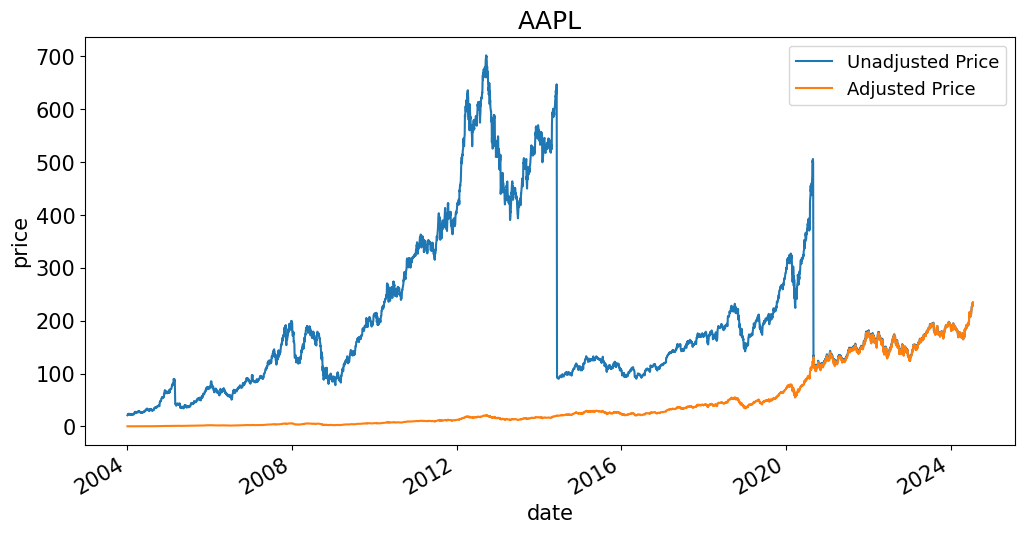

In [8]:
prices = pd.read_excel(INFILE,sheet_name=f'prices {TICK}').set_index('date')

prices['Unadjusted Price'].plot(title=TICK, ylabel='price', legend=['unadjusted price']);

prices[['Unadjusted Price','Adjusted Price']].plot(title=TICK, ylabel='price');

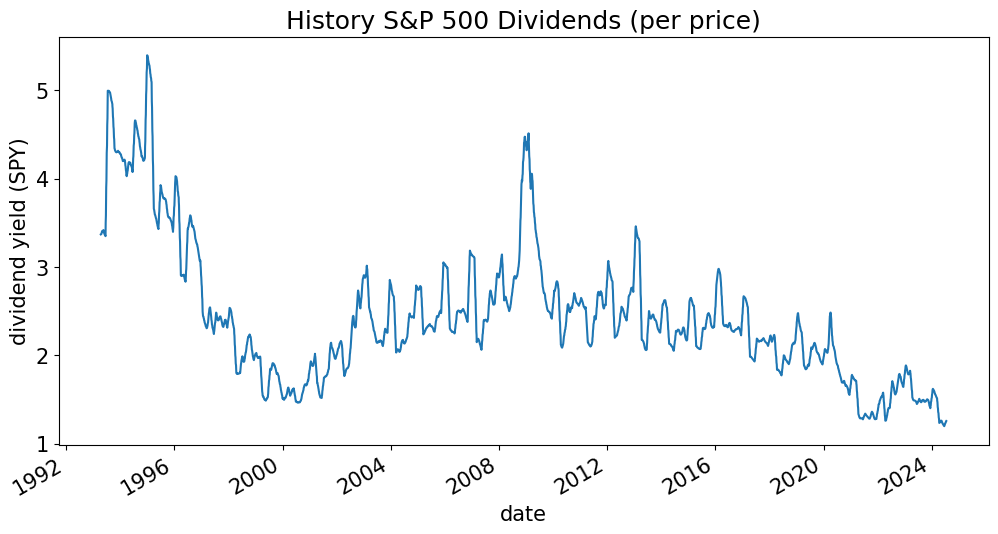

In [9]:
spy = pd.read_excel(INFILE,sheet_name=f'{TICKETF} history').set_index('date')
spy['EQY_DVD_YLD_IND'].rolling(21).mean().plot(title='History S&P 500 Dividends (per price)',ylabel=('dividend yield (SPY)'));

***

# Indexes and the S&P 500

In [10]:
ALTFILE = "../data/spx_returns_weekly.xlsx"
SHEET = "s&p500 names"
info = pd.read_excel(ALTFILE,sheet_name=SHEET).set_index('ticker')
mktcap = info['mkt cap']
if 'GOOG' in mktcap.index:
    mktcap.drop(index=['GOOGL'],inplace=True)

In [11]:
FREQ = 52
SHEET = "s&p500 rets"
rets_spx = pd.read_excel(ALTFILE, sheet_name=SHEET).set_index("date")

#sns.heatmap(cluster_corr(rets_spx.corr()))
#plt.title('Correlation: S&P500 Members')
#plt.show()

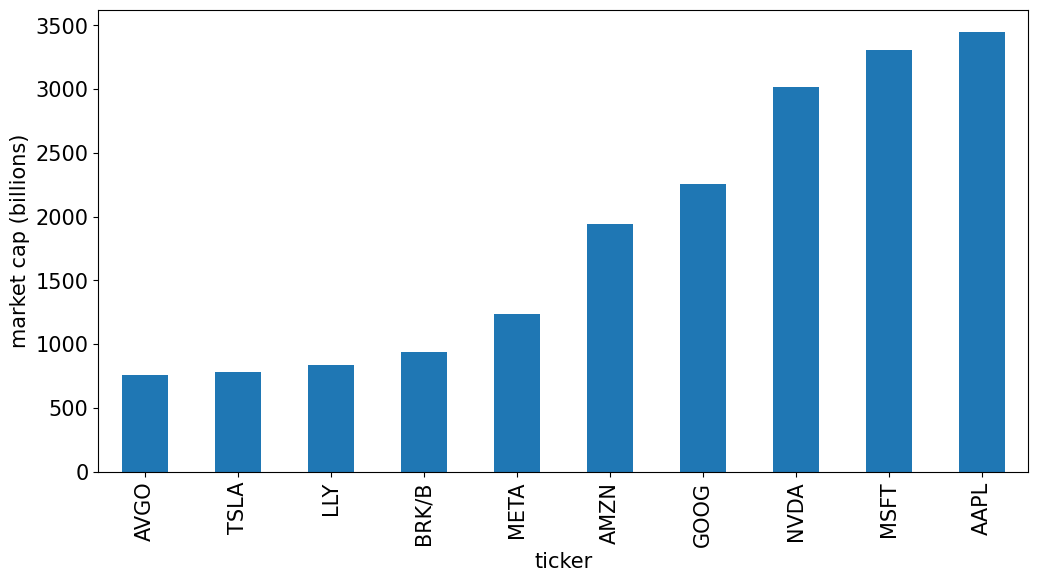

In [12]:
(mktcap/1e9).sort_values().tail(10).plot(kind='bar')
plt.ylabel('market cap (billions)')
plt.show()

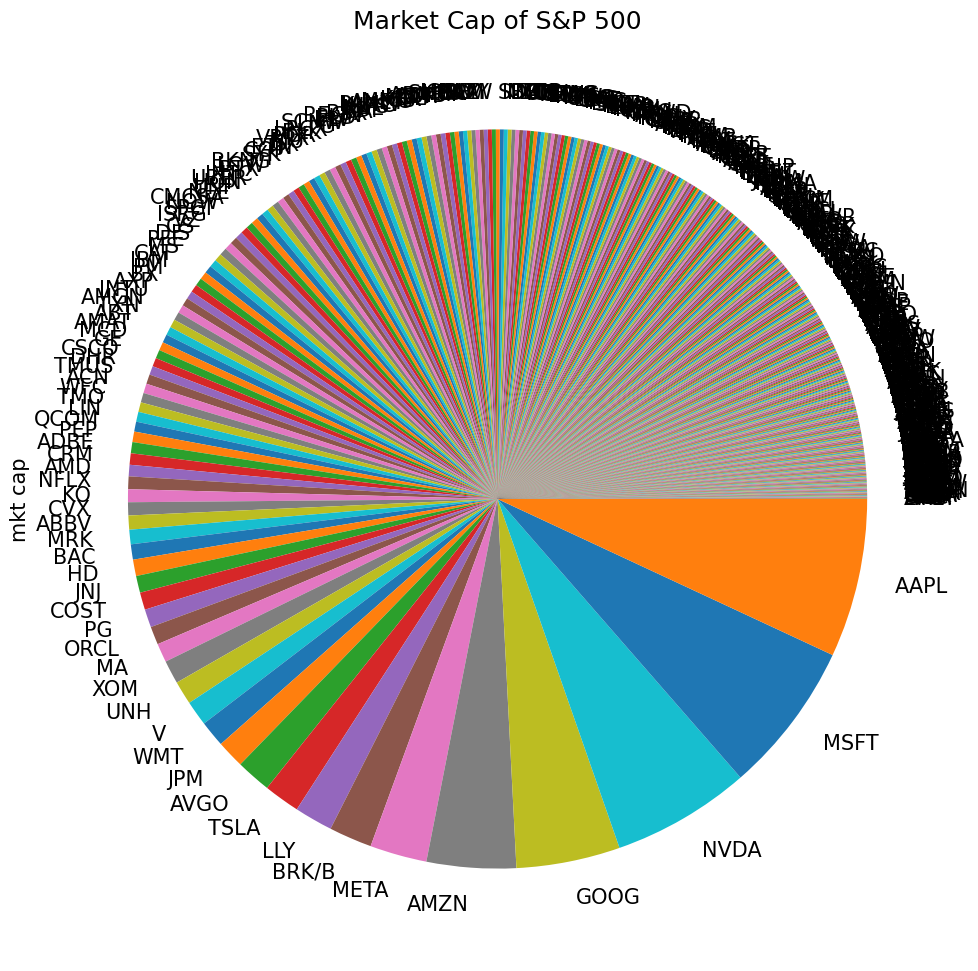

In [13]:
temp = mktcap.sort_values(ascending=True)
plt.figure(figsize=(12, 12))
temp.plot(kind='pie')
plt.title('Market Cap of S&P 500')
plt.show()

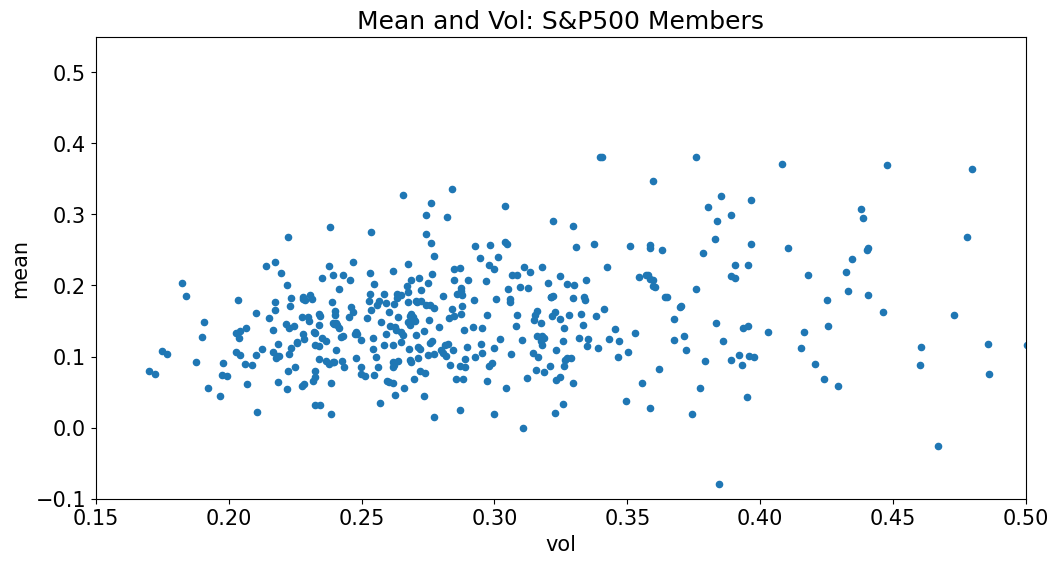

In [14]:
temp = pd.concat([rets_spx.mean()*FREQ, rets_spx.std()*FREQ**.5],axis=1)
temp.columns=['mean','vol']
temp.plot.scatter(x='vol',y='mean',xlim=(.15,.5),ylim=(-.1,.55));
plt.title('Mean and Vol: S&P500 Members');

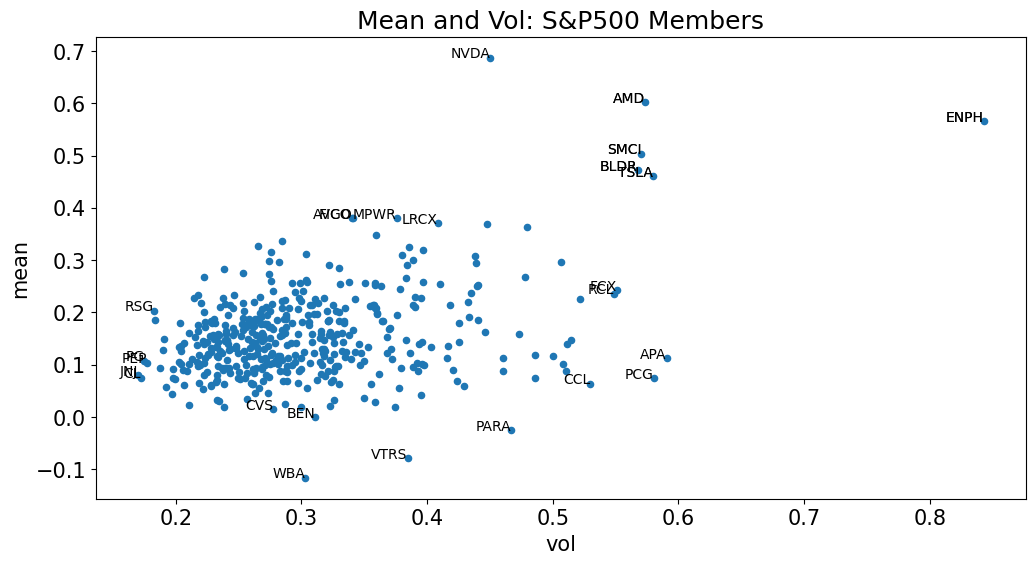

In [15]:
temp = pd.concat([rets_spx.mean()*FREQ, rets_spx.std()*FREQ**.5],axis=1)
temp.columns=['mean','vol']

temp.plot.scatter(x='vol',y='mean');
plt.title('Mean and Vol: S&P500 Members');

NBIG = 10
NSMALL = 5

top_n = temp.nlargest(NBIG, 'mean')
for idx, row in top_n.iterrows():
    plt.text(row['vol'], row['mean'], idx, fontsize=10, ha='right')

top_n = temp.nlargest(NBIG, 'vol')
for idx, row in top_n.iterrows():
    plt.text(row['vol'], row['mean'], idx, fontsize=10, ha='right')

top_n = temp.nsmallest(NSMALL, 'mean')
for idx, row in top_n.iterrows():
    plt.text(row['vol'], row['mean'], idx, fontsize=10, ha='right')

top_n = temp.nsmallest(NSMALL, 'vol')
for idx, row in top_n.iterrows():
    plt.text(row['vol'], row['mean'], idx, fontsize=10, ha='right')

## ETFs

An **exchange-traded-fund**
* Trades on a stock exchange
* Shares of the fund which may hold a variety of assets
* Can be traded intra-day

### Questions
* What is an ETF?
* How does an ETF compare to Mutual Funds? 
* Why trade ETF’s?

### History
ETFs Began trading in the U.S. in 1993.
* Active-ETF’s approved in 2008.
* Around 2,000 ETF’s trade in U.S. markets.

### Variety
ETFs include funds
* passively tracking an index of equities
* actively tracking an equity style or trading strategy (smart beta)
* alternative assets

Most ETF’s track an index. ie. S&P 500, U.S. Treasury rate, BBB-AAA credit spread, etc.
* Target wide variety of equity sectors and geographies.
* Funds for a variety of asset classes: equities, oil, grains, credit instruments, etc.
* Active ETF’s tracking a strategy.

Note that the fund expenses and liquidity vary considerably across ETFs.

Consider a few examples.

In [16]:
etf_info = pd.read_excel(INFILE,sheet_name=f'etf info').set_index('ticker')
etf_info[['fund_expense_ratio','eqy_dvd_yld_ind']] /= 100
etf_info.style.format({'fund_expense_ratio':'{:.2%}','eqy_dvd_yld_ind':'{:.2%}'})

,total_number_of_holdings_in_port,fund_expense_ratio,fund_asset_class_focus,fund_objective_long,eqy_dvd_yld_ind
ticker,,,,,
SPY,504,0.09%,Equity,Large-cap,1.27%
UPRO,522,0.92%,Equity,Large-cap,1.12%
EEM,1238,0.70%,Equity,Emerging Markets,1.36%
VGK,1293,0.09%,Equity,European Region,6.07%
EWJ,208,0.50%,Equity,Japan,1.45%
IYR,73,0.40%,Equity,Real Estate,2.33%
DBC,22,0.87%,Commodity,Broad Based,4.86%
HYG,1232,0.49%,Fixed Income,Corporate,6.21%
TIP,50,0.19%,Fixed Income,Inflation Protected,4.90%


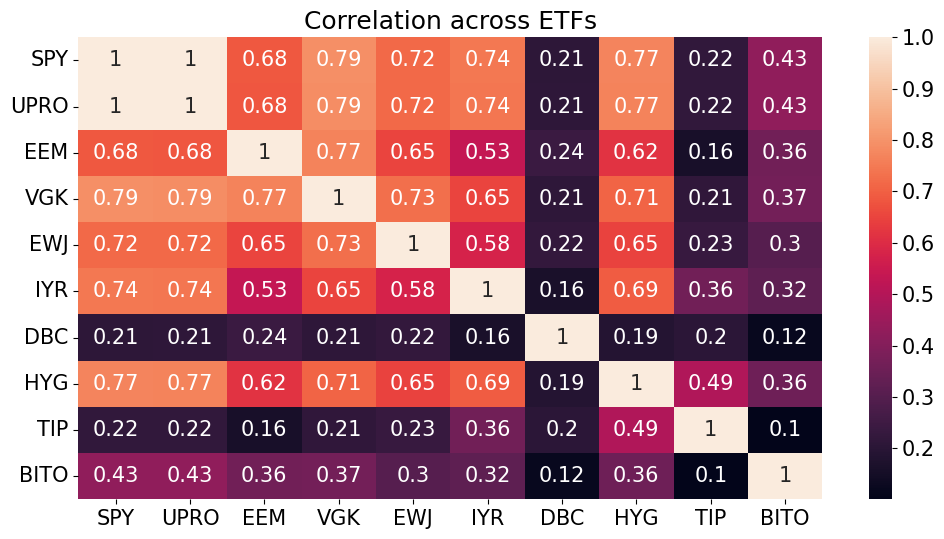

In [17]:
etfs = pd.read_excel(INFILE,sheet_name=f'etf history').set_index('date')
rets_etf = etfs.pct_change(fill_method=None).dropna()
sns.heatmap(rets_etf.corr(),annot=True);
plt.title('Correlation across ETFs');

### SPX vs SPY?

If we need a benchmark for a strategy, should we use SPX or SPY?

Why do they seem to have different return statistics below?

In [18]:
cols_international = ['NKY','HSI','UKX','DAX']
cols_forward = ['NKY','HSI']

indexes = pd.read_excel(INFILE,sheet_name=f'index history').set_index('date')
rets_index = indexes.pct_change(fill_method=None).dropna()
rets_index = pd.concat([rets_index.drop(columns=cols_international),rets_index[cols_international]],axis=1)
rets_index[cols_forward] = rets_index[cols_forward].shift(-1)

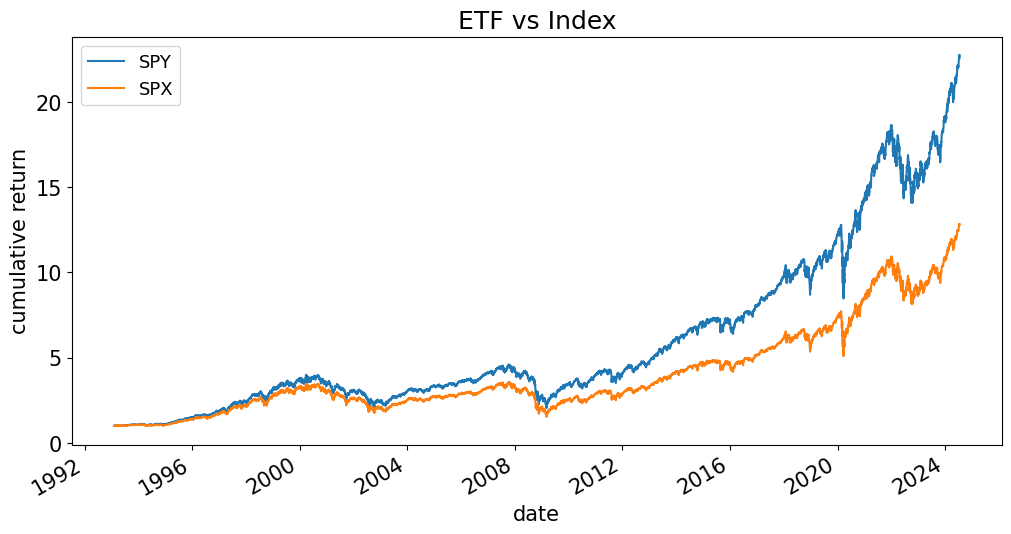

In [19]:
spy_vs_spx = pd.concat([etfs[['SPY']],indexes[['SPX']]],axis=1).dropna().pct_change()
(spy_vs_spx+1).cumprod().plot(title='ETF vs Index',ylabel='cumulative return');

## Levered ETFs

Levered ETFs seek to provide levered exposure to an index, such as the SPX.

These include inverse-levered ETFs.

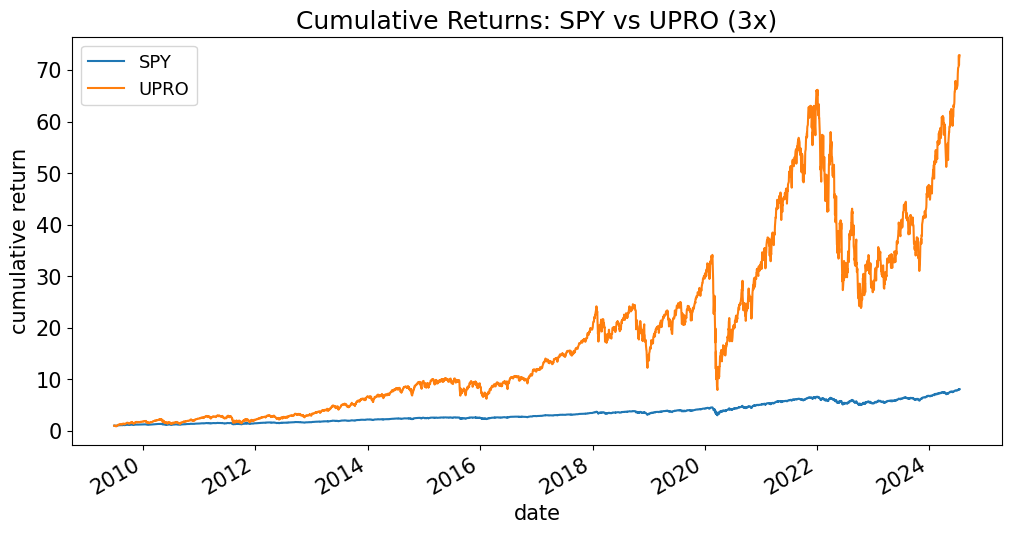

In [20]:
spy_vs_letf = etfs[['SPY','UPRO']].dropna()

temp = (spy_vs_letf.pct_change()+1).cumprod()
temp.plot(title='Cumulative Returns: SPY vs UPRO (3x)',ylabel='cumulative return');

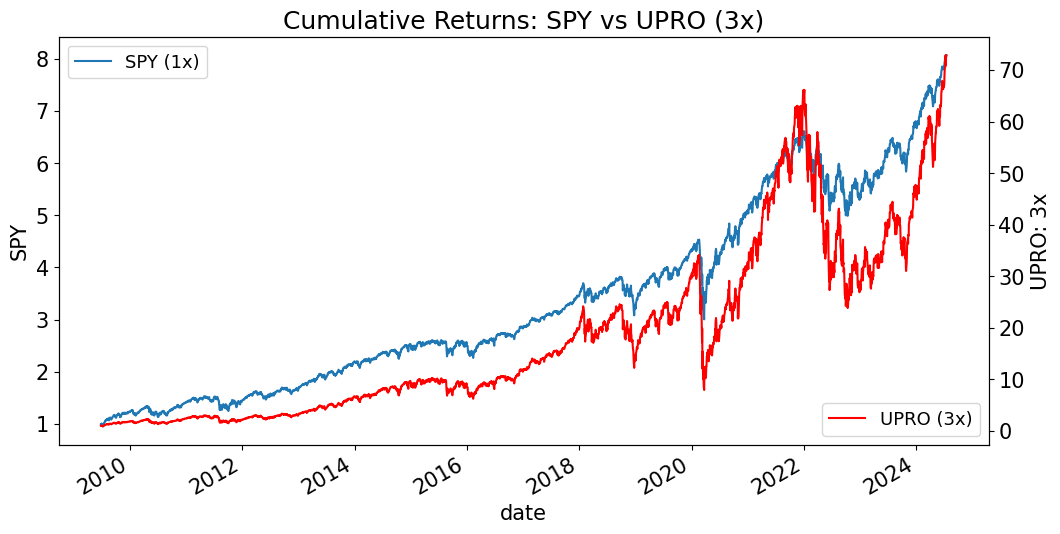

In [21]:
fig, ax = plt.subplots()
temp[['SPY']].plot(ax=ax,ylabel='SPY');
ax.legend(['SPY (1x)'],loc='upper left')
ax2 = plt.twinx(ax=ax)
temp[['UPRO']].plot(ax=ax2,color='r',ylabel='UPRO: 3x');
ax2.legend(['UPRO (3x)'],loc='lower right');
plt.title('Cumulative Returns: SPY vs UPRO (3x)');